### Analysis Goals
In this analysis the purpose is to analyse Linear Regression Methods along with Lasso, Ridge and ElasticNet Regularization. I will not be foucusing more on Data Preparation and EDA part.

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# Load data
melbourne_housing = pd.read_csv(r"D:\Datasets\Melbourne_housing.csv")
melbourne_housing.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [3]:
melbourne_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
melbourne_housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [5]:
# We are going to drop below columns as OneHotEncoding will increase number of columns by huge number
# Also our main objective here is not on data cleaning but on demonstrating Linear Regression Algorithms hence saving time

melbourne_housing.drop(['Suburb', 'Address', 'SellerG', 'Lattitude', 'Longtitude', 'Propertycount'],axis=1, inplace=True)

In [6]:
# Drop all rows if any columns in a row contains null value
melbourne_housing.dropna(inplace=True)
melbourne_housing.shape

(8895, 15)

In [7]:
# Create dummy features for categorical columns
melbourne_housing = pd.get_dummies(melbourne_housing, columns=['Type', 'Method', 'CouncilArea', 'Regionname'], drop_first=True)
melbourne_housing.shape

(8895, 56)

In [8]:
# Extract sell year from date and convert to integer type
melbourne_housing['SellYear'] = melbourne_housing.Date.apply(lambda x: x[-4:]).astype(np.int)
melbourne_housing.drop(['Date'],axis=1, inplace=True)

# Conver YearBuilt from object to integer
melbourne_housing.YearBuilt = melbourne_housing.YearBuilt.astype(np.int)

In [9]:
melbourne_housing.isnull().sum().sum()   # All null values removed

0

In [10]:
# Create a dictionary to save r2scores for each algorithm
r2score_dict = {}

### Simple Linear Regression

In [11]:
# Prepare data for fitting
X = melbourne_housing.drop(['Price'], axis=1)
y = melbourne_housing['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [12]:
# Create simple linear regression object, fit to data and calculate r2score
slr = LinearRegression()
slr.fit(X_train, y_train)
slr_predictions = slr.predict(X_test)
slr_r2score = r2_score(y_test, slr_predictions)
r2score_dict['Simple Linear Regression'] = slr_r2score
slr_r2score

0.67562885178392

Text(0.5, 1.06, 'Melbourne Housing Price Predictions vs Actual')

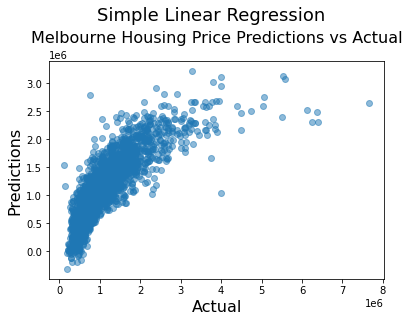

In [13]:
# Plot of predictions vs actual
fig = plt.figure(figsize = (6,4))
plt.scatter(y_test, slr_predictions, alpha=.5)
fig.suptitle('Simple Linear Regression', fontsize=18, y=1.07)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.title('Melbourne Housing Price Predictions vs Actual', fontsize=16, y=1.06)

### Simple Linear Regression using MinMaxScaler

In [14]:
mms = MinMaxScaler()
slr_WithMinMaxScaling = LinearRegression()

trainingset = X_train.copy()  # copy because we dont want to scale this more than once.
testset = X_test.copy()
trainingset = mms.fit_transform(trainingset)
testset = mms.transform(testset)
slr_WithMinMaxScaling.fit(trainingset, y_train)

LinearRegression()

In [15]:
slr_WithMinMaxScaling_predictions = slr_WithMinMaxScaling.predict(testset)
slr_WithMinMaxScaling_r2score = r2_score(y_test, slr_WithMinMaxScaling_predictions)
r2score_dict['Simple Linear Regression with MinMax Scaling'] = slr_WithMinMaxScaling_r2score
slr_WithMinMaxScaling_r2score # Using MinMax scaling with Linear regression does not improve performance of model much

0.6756288517839144

Text(0.5, 1.06, 'Melbourne Housing Price Predictions vs Actual')

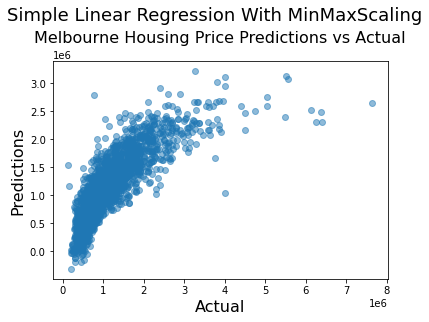

In [16]:
# Plot of predictions vs actual
fig = plt.figure(figsize = (6,4))
plt.scatter(y_test, slr_WithMinMaxScaling_predictions, alpha=.5)
fig.suptitle('Simple Linear Regression With MinMaxScaling', fontsize=18, y=1.07)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.title('Melbourne Housing Price Predictions vs Actual', fontsize=16, y=1.06)

### Cross Validation

In [17]:
# Evaluate Simple Linear Regression with Cross Validation
kf = KFold(shuffle = True, random_state = 18, n_splits = 3)

cvlr = LinearRegression()
estimator = Pipeline([("scaler", mms), ("regression", cvlr)])

In [18]:
cvlr_predictions = cross_val_predict(estimator, X, y, cv = kf)
cvlr_r2score_ = r2_score(y, cvlr_predictions)
cvlr_r2score = np.mean(cvlr_r2score_)
r2score_dict['Simple Linear Regression with MinMax Scaling & Cross Validation'] = cvlr_r2score
cvlr_r2score    # The r2score has not improved using Cross Validation

0.6706223090110537

Text(0.5, 1.06, 'Melbourne Housing Price Predictions vs Actual')

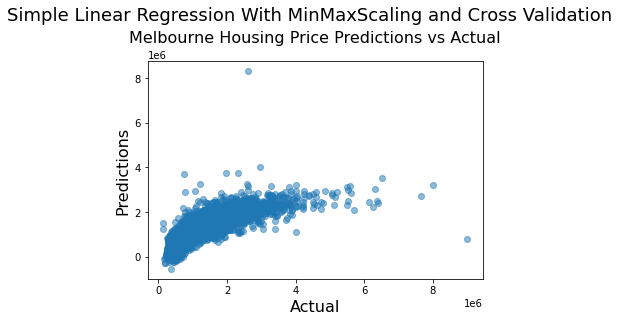

In [19]:
# Plot of predictions vs actual
fig = plt.figure(figsize = (6,4))
plt.scatter(y, cvlr_predictions, alpha=.5)
fig.suptitle('Simple Linear Regression With MinMaxScaling and Cross Validation', fontsize=18, y=1.07)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.title('Melbourne Housing Price Predictions vs Actual', fontsize=16, y=1.06)

### Lasso Regularization

In [20]:
alphas = np.geomspace(1e-7, 1e2, num=10)

scores = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([ ("scaler", mms),
                           ("lasso_regression", las) ])

    las_predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, las_predictions)
    
    scores.append(score)

r2score_dict['Lasso Regression'] = np.mean(scores)

In [21]:
list(zip(alphas,scores)) # r2score has not improved much using Lasso Regression

[(1e-07, 0.6706223090113645),
 (1e-06, 0.6706223090141606),
 (1e-05, 0.6706223090421226),
 (0.0001, 0.670622309321736),
 (0.001, 0.6706223121178603),
 (0.01, 0.6706223400713429),
 (0.1, 0.6706226188802155),
 (1.0, 0.6706253358322243),
 (10.0, 0.6706489537136725),
 (100.0, 0.6704695991378247)]

In [22]:
Lasso(alpha=10).fit(X, y).coef_ # Some coefficients have become zero

array([ 1.23881959e+05, -3.73242890e+04,  2.58427593e+02,  0.00000000e+00,
        1.63035662e+05,  4.51868398e+04,  1.86134225e+01,  1.56302749e+03,
       -2.65453169e+03, -1.94390263e+05, -3.99733121e+05,  7.07837298e+04,
        3.82347309e+04,  4.63364250e+04,  1.73854492e+04,  6.79704018e+05,
        6.29301083e+05, -1.39670156e+05,  4.06570055e+05,  4.53165797e+04,
        1.36670653e+05,  4.35193115e+05,  3.12090010e+05,  6.57051757e+04,
        1.06104426e+05, -2.20445126e+04,  1.92642699e+05, -2.65095584e+04,
        3.00269431e+05,  1.01185384e+05, -4.59654840e+04,  1.20968574e+05,
        2.75307764e+05, -2.21351868e+05,  3.10988700e+05,  2.49466411e+05,
        1.07063908e+05,  0.00000000e+00,  8.69520778e+04, -2.31052955e+05,
        3.91711399e+05,  6.50672296e+05,  2.11909903e+05, -5.45806470e+03,
       -1.89813834e+05,  2.33147713e+05,  1.61248243e+05, -0.00000000e+00,
       -2.29837521e+05,  1.50735814e+05,  2.58418131e+04, -1.07507349e+05,
       -1.55117763e+05,  

In [23]:
len(Lasso(alpha=10).fit(X, y).coef_[Lasso(alpha=10).fit(X, y).coef_ == 0]) # 3 coefficients became zero using Lasso

3

In [24]:
Best_lasso = Lasso(alpha=10).fit(X, y)
number_of_zero_coeff = len(Best_lasso.coef_[Best_lasso.coef_ == 0])
print(('{} coefficients became zero using Lasso Regularization.'.format(number_of_zero_coeff)))

3 coefficients became zero using Lasso Regularization.


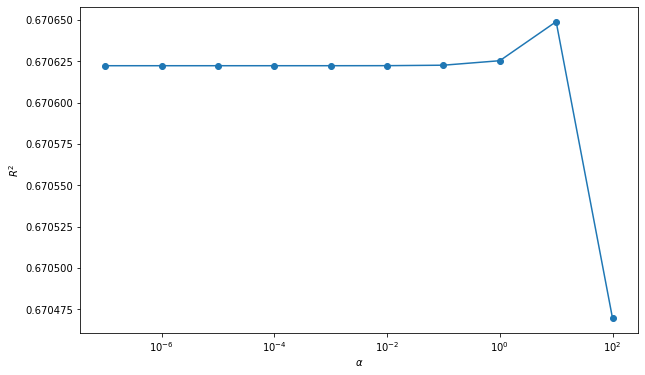

In [25]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

### Lasso Regularization with Polynomial Features

In [26]:
# Create polynomial feature object
pf = PolynomialFeatures(degree=2)

In [27]:
# We will use best alpha from previous step, alpha = 10
las_WithPoly = Pipeline([
        ("scaler", mms),
        ("make_higher_degree", pf),
        ("lasso_regression", Lasso(alpha=10))])

las_WithPoly.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('make_higher_degree', PolynomialFeatures()),
                ('lasso_regression', Lasso(alpha=10))])

In [28]:
las_WithPoly_predictions = las_WithPoly.predict(X)
las_WithPoly_r2score = r2_score(y, las_WithPoly_predictions)
r2score_dict['Lasso Regression with Polynomial Features'] = las_WithPoly_r2score
las_WithPoly_r2score  # The score has improved very well using Lasso with polynomial features and MinMax scaling

0.8188907503683591

In [29]:
df_importances = pd.DataFrame(zip(las_WithPoly.named_steps["make_higher_degree"].get_feature_names(),
                 las_WithPoly.named_steps["lasso_regression"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
df_importances.sort_values(by=1)

,0,1
117,x1 x7,-1.122345e+07
420,x7^2,-1.031334e+07
375,x6 x10,-9.226848e+06
374,x6 x9,-8.265003e+06
116,x1 x6,-8.073662e+06
...,...,...
7,x6,1.047117e+07
273,x4 x7,1.052585e+07
62,x0 x6,1.160298e+07
454,x7 x41,1.274605e+07


Text(0.5, 1.06, 'Melbourne Housing Price Predictions vs Actual')

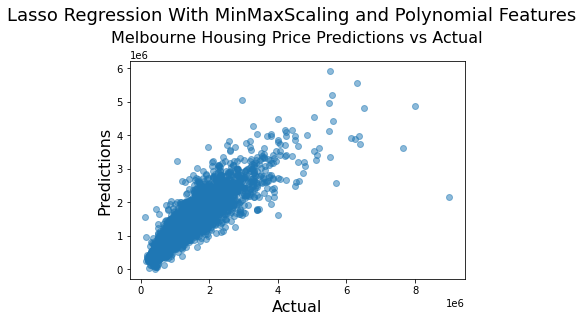

In [30]:
# Plot of predictions vs actual
fig = plt.figure(figsize = (6,4))
plt.scatter(y, las_WithPoly_predictions, alpha=.5)
fig.suptitle('Lasso Regression With MinMaxScaling and Polynomial Features', fontsize=18, y=1.07)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.title('Melbourne Housing Price Predictions vs Actual', fontsize=16, y=1.06)

### Ridge Regularization

In [31]:
alphas = np.geomspace(0.00001, 100, 8)

scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=200000)
    
    estimator = Pipeline([ ("scaler", mms),
                           ("ridge_regression", ridge) ])

    ridge_predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, ridge_predictions)
    
    scores.append(score)

r2score_dict['Ridge Regression'] = np.mean(scores)

In [32]:
list(zip(alphas,scores))

[(1e-05, 0.6706223018784172),
 (0.0001, 0.6706222376699822),
 (0.001, 0.6706215941310321),
 (0.01, 0.6706150145616917),
 (0.1, 0.6705359927766881),
 (1.0, 0.6691006801203345),
 (10.0, 0.6558765310871311),
 (100.0, 0.5887132175475279)]

In [33]:
len(Ridge(alpha=0.00001).fit(X, y).coef_[Ridge(alpha=0.00001).fit(X, y).coef_ == 0]) # 0 coefficients became zero

0

In [34]:
Best_ridge = Lasso(alpha=0.00001).fit(X, y)
number_of_zero_coeff = len(Best_ridge.coef_[Best_ridge.coef_ == 0])
print(('{} coefficients became zero using Ridge Regularization.'.format(number_of_zero_coeff)))

0 coefficients became zero using Ridge Regularization.


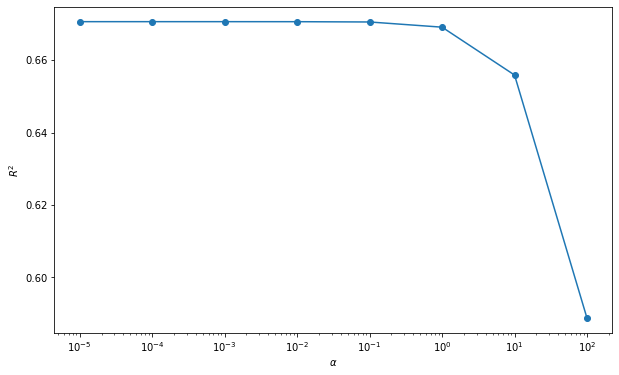

In [35]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

### Ridge Regularization with Polynomial Features

In [36]:
# We will use best alpha from previous step, alpha = 0.00001
ridge_WithPoly = Pipeline([
        ("scaler", mms),
        ("make_higher_degree", pf),
        ("ridge_regression", Ridge(alpha=0.00001))])

ridge_WithPoly.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('make_higher_degree', PolynomialFeatures()),
                ('ridge_regression', Ridge(alpha=1e-05))])

In [37]:
ridge_WithPoly_predictions = ridge_WithPoly.predict(X)
ridge_WithPoly_r2score = r2_score(y, ridge_WithPoly_predictions)
r2score_dict['Ridge Regression with Polynomial Features'] = ridge_WithPoly_r2score
ridge_WithPoly_r2score  # The score has improved very well using Ridge Regression with polynomial features and MinMax scaling

0.8338163531066394

In [38]:
df_importances = pd.DataFrame(zip(ridge_WithPoly.named_steps["make_higher_degree"].get_feature_names(),
                 ridge_WithPoly.named_steps["ridge_regression"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
df_importances.sort_values(by=1)

,0,1
178,x2 x15,-1.270071e+08
186,x2 x23,-7.833292e+07
117,x1 x7,-3.961750e+07
207,x2 x44,-3.877271e+07
166,x2 x3,-3.865054e+07
...,...,...
213,x2 x50,3.651916e+07
58,x0 x2,3.678713e+07
210,x2 x47,3.712291e+07
441,x7 x28,6.820548e+07


Text(0.5, 1.06, 'Melbourne Housing Price Predictions vs Actual')

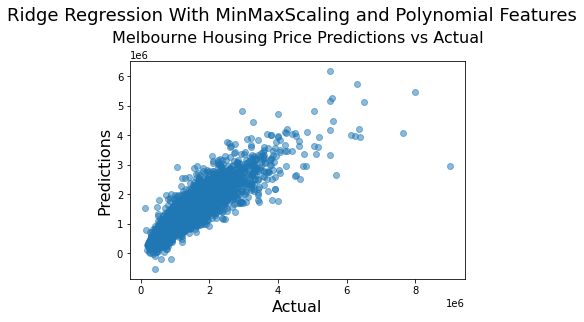

In [39]:
# Plot of predictions vs actual
fig = plt.figure(figsize = (6,4))
plt.scatter(y, ridge_WithPoly_predictions, alpha=.5)
fig.suptitle('Ridge Regression With MinMaxScaling and Polynomial Features', fontsize=18, y=1.07)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.title('Melbourne Housing Price Predictions vs Actual', fontsize=16, y=1.06)

### ElasticNet Regularization

In [40]:
l1_ratios = [0.1, 1, 5, 10]
alphas = [0.1, 1, 10, 20, 30, 40, 100]

scores = []
for alpha in alphas:
    for l1_ratio in l1_ratios:
        elasticNet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=100000)
    
        estimator = Pipeline([ ("scaler", mms),
                               ("elasticNet_regression", elasticNet) ])

        elasticNet_predictions = cross_val_predict(estimator, X, y, cv = kf)
    
        score = r2_score(y, elasticNet_predictions)
    
        scores.append(score)

r2score_dict['ElasticNet Regression'] = np.mean(scores)

In [41]:
hplist = []
for alpha in alphas:
    for l1_ratio in l1_ratios:
        hplist.append((alpha, l1_ratio))

In [42]:
list(zip(hplist, scores))

[((0.1, 0.1), 0.442221389322879),
 ((0.1, 1), 0.6706226188802155),
 ((0.1, 5), -16.29398412470547),
 ((0.1, 10), -0.36648619113232095),
 ((1, 0.1), 0.14533212000662687),
 ((1, 1), 0.6706253358322243),
 ((1, 5), -0.05117955961444287),
 ((1, 10), -0.02157002099869776),
 ((10, 0.1), 0.01950537996758861),
 ((10, 1), 0.6706489537136725),
 ((10, 5), -0.004818286492416002),
 ((10, 10), -0.002220698182126668),
 ((20, 0.1), 0.009871900962165947),
 ((20, 1), 0.670664214310932),
 ((20, 5), -0.002478760943843472),
 ((20, 10), -0.0011891732392539378),
 ((30, 0.1), 0.006572134004458663),
 ((30, 1), 0.6706711372755884),
 ((30, 5), -0.0017038860259013244),
 ((30, 10), -0.0008463031017234002),
 ((40, 0.1), 0.004905070978082793),
 ((40, 1), 0.6706658568988586),
 ((40, 5), -0.0013173726138431263),
 ((40, 10), -0.0006750494846718968),
 ((100, 0.1), 0.0018749676797661374),
 ((100, 1), 0.6704695991378247),
 ((100, 5), -0.0006231947284944805),
 ((100, 10), -0.00036709145018587463)]

In [43]:
list(sorted(zip(scores, hplist), reverse=True))[0]  # Best parameters

(0.6706711372755884, (30, 1))

In [44]:
Best_elasticNet = ElasticNet(alpha=30, l1_ratio=1).fit(X, y)
number_of_zero_coeff = len(Best_elasticNet.coef_[Best_elasticNet.coef_ == 0])
print(('{} coefficients became zero using ElasticNet Regularization.'.format(number_of_zero_coeff)))

2 coefficients became zero using ElasticNet Regularization.


### ElasticNet Regression with Polynomial Features

In [45]:
# We will use best alpha and l1_ratio parameters from previous step, alpha = 30 and l1_ratio = 1
elasticNet_WithPoly = Pipeline([
        ("scaler", mms),
        ("make_higher_degree", pf),
        ("ridge_regression", ElasticNet(alpha=30, l1_ratio=1, max_iter=1e4))])

elasticNet_WithPoly.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('make_higher_degree', PolynomialFeatures()),
                ('ridge_regression',
                 ElasticNet(alpha=30, l1_ratio=1, max_iter=10000.0))])

In [46]:
elasticNet_WithPoly_predictions = elasticNet_WithPoly.predict(X)
elasticNet_WithPoly_r2score = r2_score(y, elasticNet_WithPoly_predictions)
r2score_dict['ElasticNet Regression with Polynomial Features'] = elasticNet_WithPoly_r2score
elasticNet_WithPoly_r2score  # The score has improved very well using elasticNet with polynomial features and MinMax scaling

0.8050397351428221

In [47]:
df_importances = pd.DataFrame(zip(elasticNet_WithPoly.named_steps["make_higher_degree"].get_feature_names(),
                 elasticNet_WithPoly.named_steps["ridge_regression"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
df_importances.sort_values(by=1)

,0,1
420,x7^2,-8.996819e+06
375,x6 x10,-5.705282e+06
117,x1 x7,-5.292825e+06
57,x0 x1,-4.128708e+06
393,x6 x28,-3.680488e+06
...,...,...
8,x7,6.046650e+06
7,x6,6.461514e+06
453,x7 x40,9.283488e+06
273,x4 x7,1.005921e+07


Text(0.5, 1.06, 'Melbourne Housing Price Predictions vs Actual')

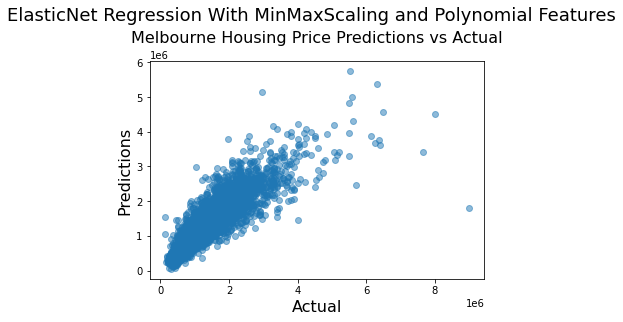

In [48]:
# Plot of predictions vs actual
fig = plt.figure(figsize = (6,4))
plt.scatter(y, elasticNet_WithPoly_predictions, alpha=.5)
fig.suptitle('ElasticNet Regression With MinMaxScaling and Polynomial Features', fontsize=18, y=1.07)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.title('Melbourne Housing Price Predictions vs Actual', fontsize=16, y=1.06)

In [49]:
r2score_dict

{'Simple Linear Regression': 0.67562885178392,
 'Simple Linear Regression with MinMax Scaling': 0.6756288517839144,
 'Simple Linear Regression with MinMax Scaling & Cross Validation': 0.6706223090110537,
 'Lasso Regression': 0.6706100396142524,
 'Lasso Regression with Polynomial Features': 0.8188907503683591,
 'Ridge Regression': 0.6583384462216006,
 'Ridge Regression with Polynomial Features': 0.8338163531066394,
 'ElasticNet Regression': -0.40802889406223236,
 'ElasticNet Regression with Polynomial Features': 0.8050397351428221}

In [50]:
best_model, best_score = sorted(r2score_dict.items(),key=lambda item: item[1], reverse=True)[0]

### Conclusion


In [51]:
print('The best score %0.4f is obtained by using {}.'.format(best_model) % (best_score))

The best score 0.8338 is obtained by using Ridge Regression with Polynomial Features.


### Result Discussion
In this demonstration, we observed that 'Ridge regression with Polynomial Features' proved best model for predicting house price. The difference of r2 scores for regularization techniques like Lasso, Ridge and Elasticnet is very small centered around 0.82. As compared to simple linear regression and simple linear regression with scaling and cross validation regression with regularization gives better result.
The results can be improved further by cleaning and preparing data more thouroughly.

### Further Steps
Here I used MinMax scaling only. The same analysis can be checked using other scaling methods. The same data can be modeled using LassoCV, RidgeCV and ElasticNetCV to check if performance improved further. Considering huge computational power and time required on personal laptop, I have tuned hyperparameters only to limited range however hyperparameter range can be extended and more best parameters can be found. We can also use GridSearchCV and RandomSearchCV for finding best parameters.
The models can be evaluated on different error metrics to understand effect of different techniques on model performance.